In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Curve fitting using SciPy curve_fit 

- Use non-linear least squares to fit a function, f, to data.
- Assumes ydata = f(xdata, *params) + eps.
- returns popt (optimal values), pcov(estimated covariance of popt)

In [2]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

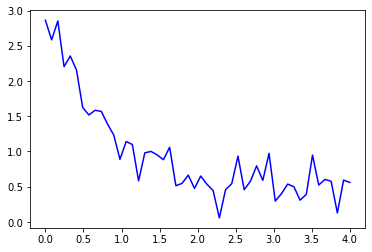

In [3]:
# data generation 
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


[2.55423706 1.35190947 0.47450618]
[2.43708906 1.         0.35015434]


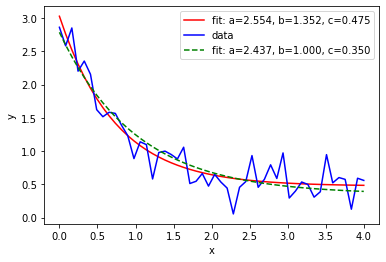

In [4]:

# Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Constrain the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Nonlinear regression

Text(0.5, 1.0, 'Non Linear Data')

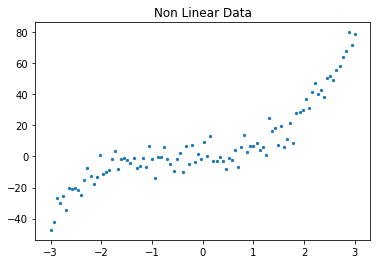

In [5]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score 

x = np.linspace(-3,3,100)
y = 2.1 * x**3 + 2.1 * x**2 + 1.4 * x + 0.9
y = y + np.random.randn(100) * 5.2

plt.scatter(x, y, s = 5) 
plt.title('Non Linear Data')

### Linear Regression

w: [12.71914069] b: 7.1375009482083085
MSE:  149.4927210828106 R2 score:  0.7680942222246133


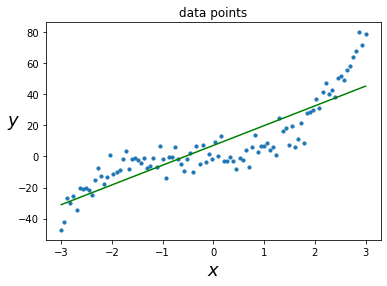

In [6]:
lrg = LinearRegression() 
lrg.fit(x.reshape(-1,1), y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, s = 10) 
plt.xlabel("$x$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.title("data points") 
plt.plot(x, y_pred, color ='g') 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

#### Polynomial Features

고차원의 새로운 특성을 생성

하지만 Polynomial로 데이터셋이 표현될 지 확인할 수 없고, 새로운 특성을 생성하는 데 시간이 오래 걸리기 때문에 거의 사용하지 않음. 

In [7]:
# now we make the model bit complex, e.g. degrees 2, and proceed with linear regression

poly_f = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_f.fit_transform(x.reshape(-1,1)) 
x[:5], x_poly[:5]   # one more column for square of x introduced

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 array([[-3.        ,  9.        ],
        [-2.93939394,  8.64003673],
        [-2.87878788,  8.28741965],
        [-2.81818182,  7.94214876],
        [-2.75757576,  7.60422406]]))

w: [12.71914069  2.36863223] b: -0.11194920873109382
MSE:  107.46171336850507 R2 score:  0.8332962833287783


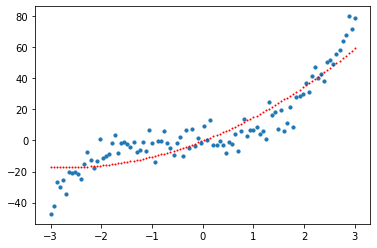

In [8]:
lrg = LinearRegression() 
lrg.fit(x_poly, y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, s = 10) 
plt.scatter(x, y_pred, c ='r', s=1) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

In [9]:
# try degree 3
poly_f = PolynomialFeatures(degree = 3, include_bias = False) 
x_poly = poly_f.fit_transform(x.reshape(-1,1)) 
x[0], x_poly[0]   # more columns introduced

(-3.0, array([ -3.,   9., -27.]))

w: [1.33100719 2.36863223 2.06742863] b: -0.1119492087310956
MSE:  31.919252152549316 R2 score:  0.9504841510487645


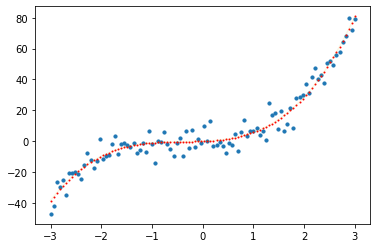

In [10]:
lrg = LinearRegression() 
lrg.fit(x_poly, y) 
print('w:', lrg.coef_, 'b:', lrg.intercept_) 
y_pred = lrg.predict(x_poly) 
plt.scatter(x, y, s = 10) 
plt.scatter(x, y_pred, c ='r', s=1) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

# exactly the same as y_pred
a, b, c = lrg.coef_[2], lrg.coef_[1], lrg.coef_[0]
xx = np.linspace(-3,3,100)
yy = a * xx**3 + b * x**2 + c *x + lrg.intercept_
plt.plot(xx, yy, c='y', alpha=0.1)

### DecisionTree Regressor

MSE:  32.68635656990738 R2 score:  0.94929415366793


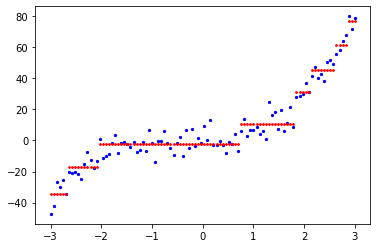

In [11]:
from sklearn.tree import DecisionTreeRegressor
lrg = DecisionTreeRegressor(max_depth=3) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

### RandomForest Regressor

MSE:  7.282559070130725 R2 score:  0.988702677206482


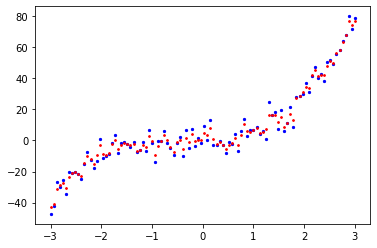

In [12]:
from sklearn.ensemble import RandomForestRegressor
lrg = RandomForestRegressor(n_estimators=200) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2)

### SVM Regressor (SVR)

MSE:  33.083607995031166 R2 score:  0.9486779035920171


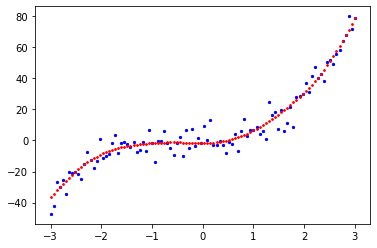

In [13]:
from sklearn.svm import SVR
lrg = SVR(C=1000) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2) 

MSE:  27.020907573049186 R2 score:  0.9580828782730256


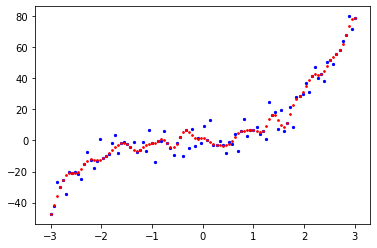

In [14]:
from sklearn.svm import SVR
lrg = SVR(C=1000, kernel='rbf', gamma=10) 
lrg.fit(x.reshape(-1,1), y) 

y_pred = lrg.predict(x.reshape(-1,1)) 
plt.scatter(x, y, c='b', s = 5) 
plt.scatter(x, y_pred, c ='r', s=3) 
mse = mean_squared_error(y, y_pred) 
rmse = np.sqrt(mean_squared_error(y, y_pred)) 
r2 = r2_score(y, y_pred)   # same as lrg.score(x,y)
print('MSE: ', mse, 'R2 score: ', r2) 